# Titanic

## Table of Contents
* Summary
* Load Data
* Clean & Preprocess

## Steps in the Data Analysis Process
1. Problem Statement
2. Get Data
3. Clean Data
4. Transform Data
5. Visualize Data
6. Model Data
7. Communicate Results

## Load Data

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

### Import Data

In [7]:
# load data
train = pd.read_csv('titanic/data/raw/train.csv') # training data
test = pd.read_csv('titanic/data/raw/test.csv') # test data

FileNotFoundError: File b'titanic/data/raw/train.csv' does not exist

In [8]:
# view the first five rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Describe Data

In [9]:
# get dataframe info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
# data dimensions
train.shape

(891, 12)

In [11]:
# create metadata dataframe
datadict = pd.DataFrame(train.dtypes)
datadict['count'] = train.count()
datadict['missing'] = train.isnull().sum()
datadict['unique'] = train.nunique()
datadict = datadict.rename(columns={0:'dtype'})
datadict

,dtype,count,missing,unique
PassengerId,int64,891,0,891
Survived,int64,891,0,2
Pclass,int64,891,0,3
Name,object,891,0,891
Sex,object,891,0,2
Age,float64,714,177,88
SibSp,int64,891,0,7
Parch,int64,891,0,7
Ticket,object,891,0,681
Fare,float64,891,0,248


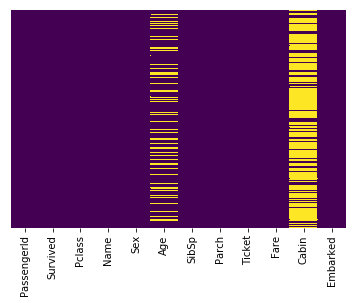

In [12]:
# heatmap of missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Data Cleaning

### Summary Statistics

In [13]:
# summary statistics for numerical data types
train.describe(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# describe object data types
train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jensen, Mr. Hans Peder",male,347082,B96 B98,S
freq,1,577,7,4,644


In [15]:
# describe the age variable
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
# median age
train.Age.median()

28.0

In [17]:
# impute age -- could be expanded to include gender?
def impute_age(cols):
    '''returns age based on passenger class where age is missing'''
    age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return age
    
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [18]:
train[train.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [19]:
# grouped means by pclass
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.062130,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.825163,0.402174,0.380435,20.662183
3,439.154786,0.242363,24.824684,0.615071,0.393075,13.675550


In [20]:
# grouped means by pclass
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.659236,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,29.832184,0.429809,0.235702,25.523893


In [21]:
# grouped means by pclass
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,29.560109,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.273889,0.473684,0.464912,48.395408


### To add here:
* above/below median age
* family/no family
* fare tiers

In [23]:
# write cleaned file to csv
train.to_csv('titanic.csv')

## Univariate Analysis

In [17]:
# count of survivors
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
# percentage of survivors
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

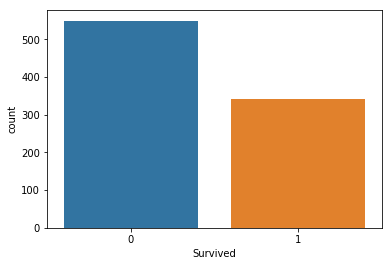

In [19]:
# survived
sns.countplot('Survived', data=train)

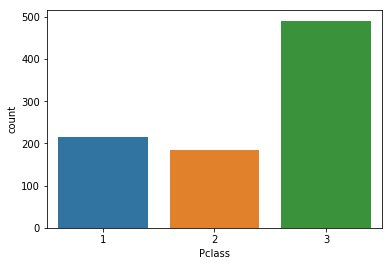

In [20]:
# survived
sns.countplot('Pclass', data=train)

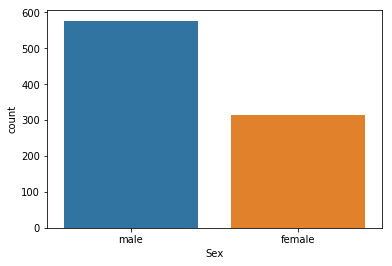

In [21]:
# survived
sns.countplot('Sex', data=train)

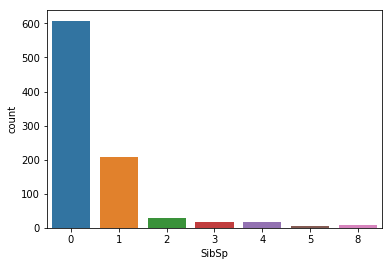

In [22]:
# survived
sns.countplot('SibSp', data=train)

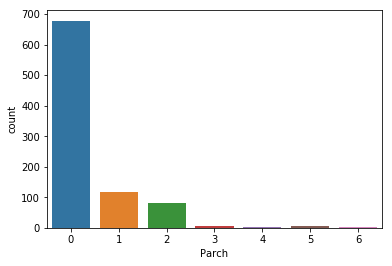

In [23]:
# survived
sns.countplot('Parch', data=train)

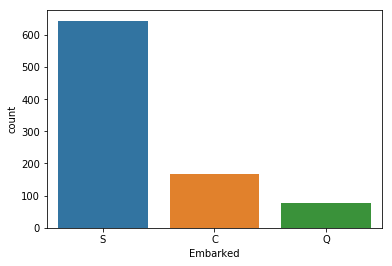

In [24]:
# survived
sns.countplot('Embarked', data=train)

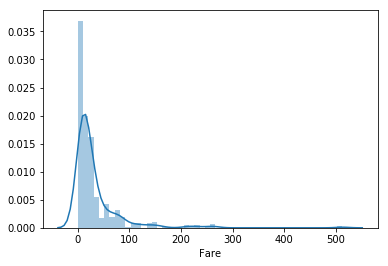

In [25]:
# fare distribution
sns.distplot(train['Fare'])

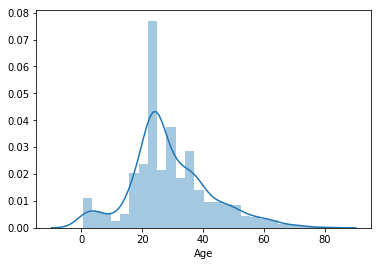

In [26]:
# age distribution
sns.distplot(train['Age'].dropna())

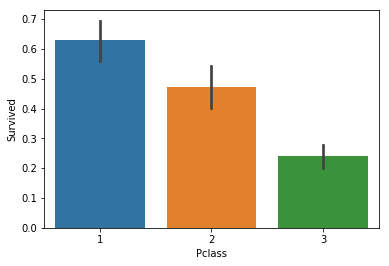

In [27]:
sns.barplot(x='Pclass', y='Survived', data=train)

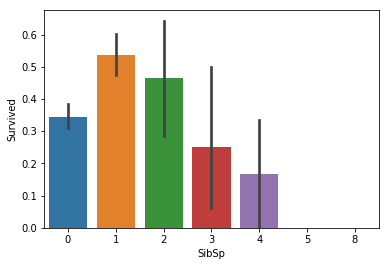

In [28]:
sns.barplot(x='SibSp', y='Survived', data=train)

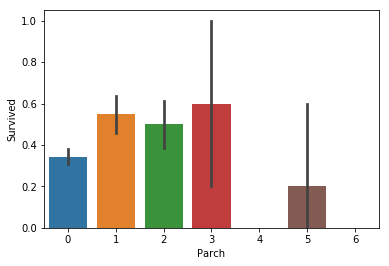

In [29]:
sns.barplot(x='Parch', y='Survived', data=train)

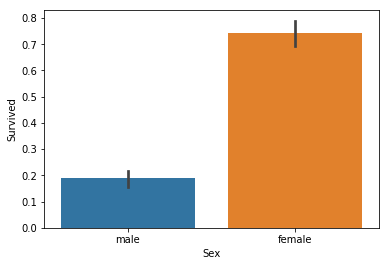

In [30]:
sns.barplot(x='Sex', y='Survived', data=train)

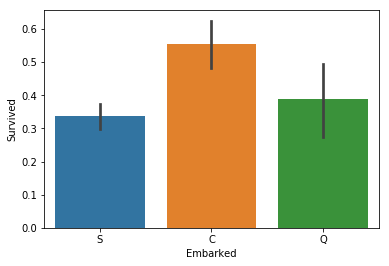

In [31]:
sns.barplot(x='Embarked', y='Survived', data=train)

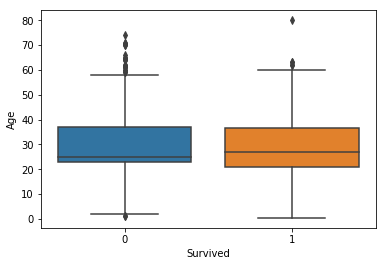

In [32]:
sns.boxplot(x='Survived',y='Age',data=train)

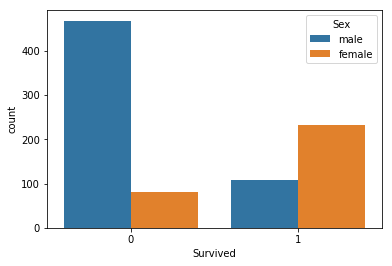

In [33]:
# survival by sex
sns.countplot(x='Survived',hue='Sex',data=train)

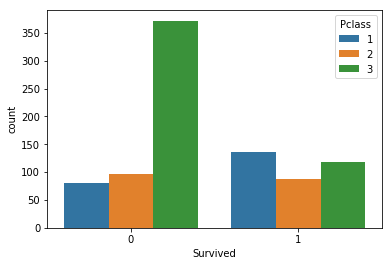

In [34]:
# survival by Pclass
sns.countplot(x='Survived',hue='Pclass',data=train)

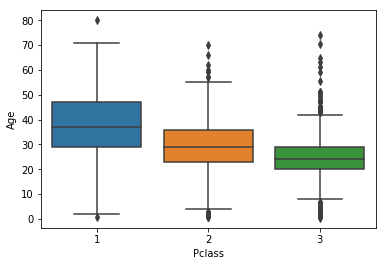

In [35]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [36]:
# drop cabin column
train.drop('Cabin',axis=1,inplace=True)

In [37]:
# drop remaining nulls
train.dropna(inplace=True)

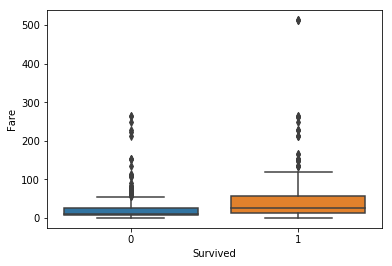

In [38]:
sns.boxplot(x='Survived',y='Fare',data=train)

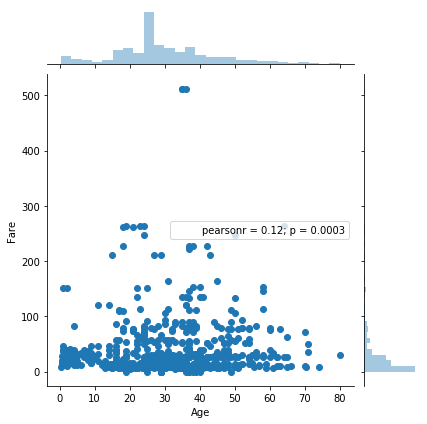

In [39]:
sns.jointplot(x='Age',y='Fare',data=train)

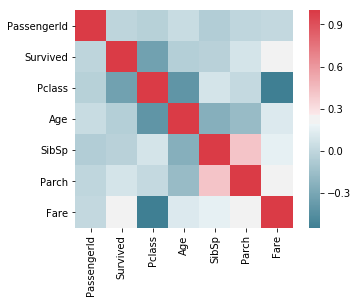

In [40]:
# correlation matrix
corr = train.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

## Preprocessing

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


When encoding dummy variables, if both are included in the model you will introduce multicollinearity as one column is a perfect predictor of the other(s)

In [42]:
# dummy variables for sex and embarked -- should also do this for pclass
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [43]:
# add columns to train
train = pd.concat([train,sex,embarked],axis=1)

In [44]:
# keep only useful columns
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [45]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Feature Engineering

In [46]:
# family size
train['FamilySize'] = train.SibSp + train.Parch

In [47]:
# travelling alone?
def alone(row):
    if row['FamilySize'] == 0:
        return 0
    else:
        return 1

train['Alone'] = train.apply(alone, axis=1)

In [48]:
# train['Log of Fare'] = [np.log(x) for x in train['Fare']]
# train.head()

In [49]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,FamilySize,Alone
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409,0.906637,0.398200
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063,1.614703,0.489803
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,10.000000,1.000000


## Machine Learning

In [50]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression()

In [55]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
predictions = logmodel.predict(X_test)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.87       163
          1       0.85      0.66      0.75       104

avg / total       0.83      0.82      0.82       267



In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test,predictions)

array([[151,  12],
       [ 35,  69]])

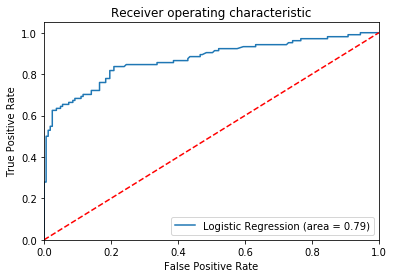

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [65]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [66]:
pred = knn.predict(X_test)

In [67]:
print(confusion_matrix(y_test,pred))

[[121  42]
 [ 37  67]]


In [68]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.77      0.74      0.75       163
          1       0.61      0.64      0.63       104

avg / total       0.71      0.70      0.71       267



In [73]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean != y_test)
    

Text(0,0.5,'Error Rate')

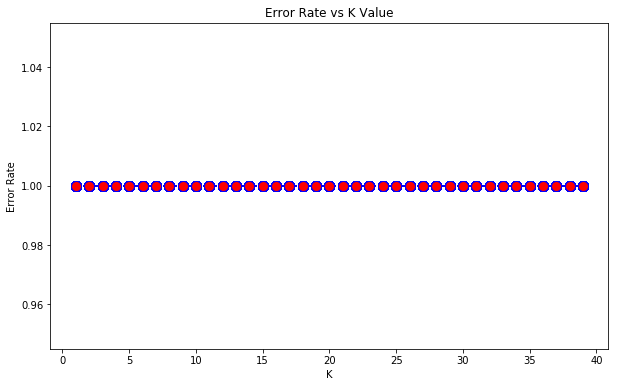

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')